In [3]:
#Read the data
import xarray
dset = xarray.open_dataset('/mnt/datawaha/hyex/wangx0o/research/Course/ErSE394/Course_Data/ERA5_Data/download.nc')

In [4]:
#Extract variables and convert them 
import numpy as np
t2m = np.array(dset.variables['t2m'])
tp = np.array(dset.variables['tp'])
latitude = np.array(dset.variables['latitude'])
longitude = np.array(dset.variables['longitude'])
time_dt = np.array(dset.variables['time'])
t2m = t2m - 273.15
tp = tp * 1000
if t2m.ndim == 4:
    t2m = np.nanmean(t2m, axis=1)
    tp = np.nanmean(tp, axis=1)

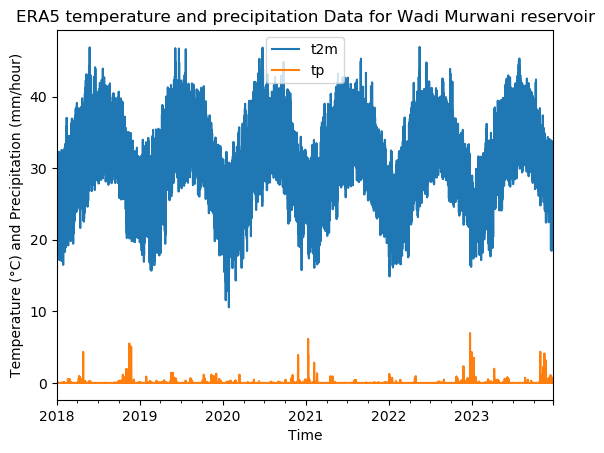

In [24]:
#Decide the location
import pandas as pd
import matplotlib.pyplot as plt
df_era5 = pd.DataFrame(index=time_dt)
df_era5['t2m'] = t2m[:,3,2]
df_era5['tp'] = tp[:,3,2]

df_era5.plot()
#add title and labels
plt.title('ERA5 temperature and precipitation Data for Wadi Murwani reservoir')
plt.xlabel('Time')
plt.ylabel('Temperature (°C) and Precipitation (mm/hour)')
plt.savefig('ERA5_t2m_tp_time_series.png')
plt.show()

In [9]:
#Calculate the average annual precipitation
annual_precip = df_era5['tp'].resample('A').mean()*24*365.25
mean_annual_precip = np.nanmean(annual_precip)
print(mean_annual_precip)


88.34638


Part3: Calculation of Potential Evaporation (PE)

In [16]:
#Calculate PE
tmin = df_era5['t2m'].resample('D').min().values
tmax = df_era5['t2m'].resample('D').max().values
tmean = df_era5['t2m'].resample('D').mean().values
lat = 21.25
doy = df_era5['t2m'].resample('D').mean().index.dayofyear

import tools
pe = tools.hargreaves_samani_1982(tmin, tmax, tmean, lat,doy)

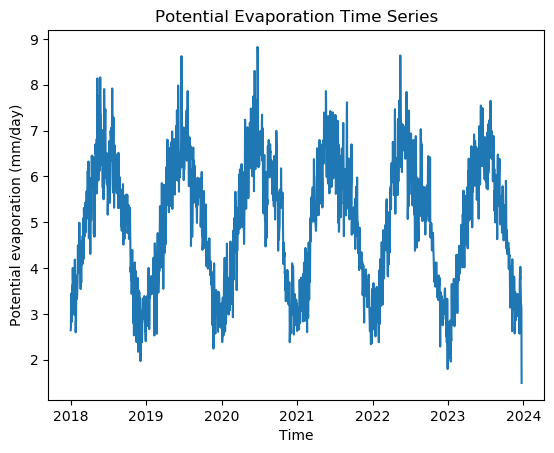

In [23]:
#Plot the PE time series:
ts_index = df_era5['t2m'].resample('D').mean().index
plt.figure()
plt.plot(ts_index, pe, label='Potential Evaporation')
plt.title('Potential Evaporation Time Series')
plt.xlabel('Time')
plt.ylabel('Potential evaporation (mm/day)')
plt.savefig('PE_time_series.png')
plt.show()


In [21]:
#Calculate the mean annual PE
pe_series = pd.Series(pe,index = ts_index)
annual_pe = pe_series.resample('A').mean()*365.25
mean_annual_pe = np.nanmean(annual_pe)
print(mean_annual_pe)


1826.8853
